In [ ]:

from src.io_utils import load_data ,coerce_numeric

df = coerce_numeric (load_data("data/library_loans.csv"))

df = df.dropna(subset=["loan_day"]).copy()
df = df[df["loan_day"] > 0].copy()


df["month"] = df["checkout_date"].dt.to_period("M").dt.to_timestamp()
df["week"] = df["checkout_date"].dt.to_period("W").dt.start_time


df.info()
# df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   loan_id           150 non-null    object        
 1   checkout_date     150 non-null    datetime64[ns]
 2   branch            150 non-null    object        
 3   genre             150 non-null    object        
 4   item_type         150 non-null    object        
 5   patron_age_group  150 non-null    object        
 6   loan_day          150 non-null    int64         
 7   return_day        150 non-null    datetime64[ns]
 8   overdue_days      150 non-null    int64         
 9   fine_amount       150 non-null    float64       
 10  month             150 non-null    datetime64[ns]
 11  week              150 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(5)
memory usage: 14.2+ KB


In [8]:
from src import metrics as M 
print("Totalt antal lån:", M.total_loans(df))
print("genomsnittlig lånetid (dagar):", f"{M.avg_loan_days(df):.1f}")
print("andel övertid(%):" , f"{100 * M.overdue_rate(df):.1f}%")

Totalt antal lån: 150
genomsnittlig lånetid (dagar): 17.7
andel övertid(%): 72.7%


In [9]:
by_genre = M.loans_by_genre(df)

by_branch = M.loans_by_branch(df)
by_genre ,by_branch

(         genre  loans
 0  Non-Fiction     23
 1      History     21
 2  Young Adult     21
 3    Biography     15
 4       Sci-Fi     14
 5      Fiction     13
 6      Mystery     12
 7      Fantasy     12
 8      Romance     10
 9     Children      9,
     branch  loans
 0     West     36
 1    North     35
 2     East     29
 3  Central     27
 4    South     23)

In [10]:
ts_month = M.loans_over_time(df, freq ="M")
ts_Week = M.loans_over_time(df, freq ="W")

ts_month.head()
# ts_Week.head()

c:\Users\hamed\OneDrive\Desktop\Lektion\Python\vecka 4\EDA\src\metrics.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(freq)["loan_id"]


,checkout_date,loans
0,2024-11-30,14
1,2024-12-31,8
2,2025-01-31,8
3,2025-02-28,14
4,2025-03-31,15


<Axes: title={'center': 'lånetid -spridning'}, xlabel='Dagar'>

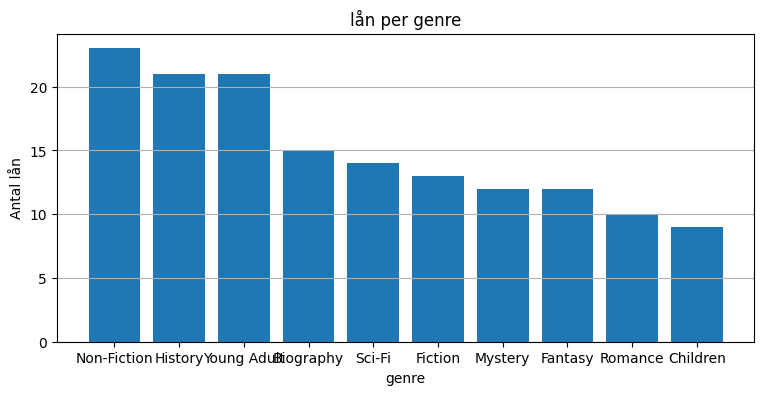

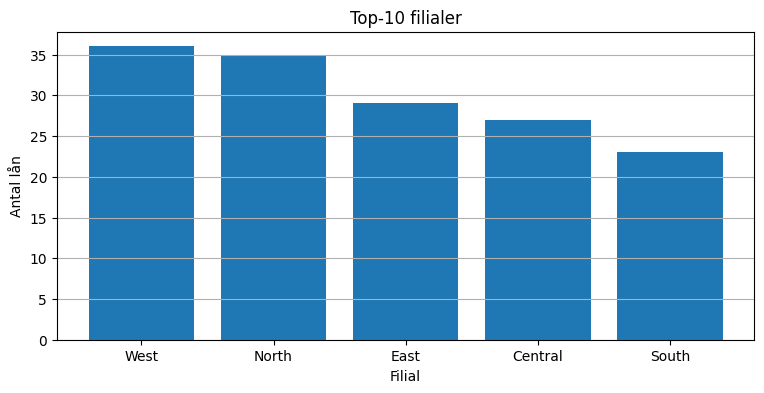

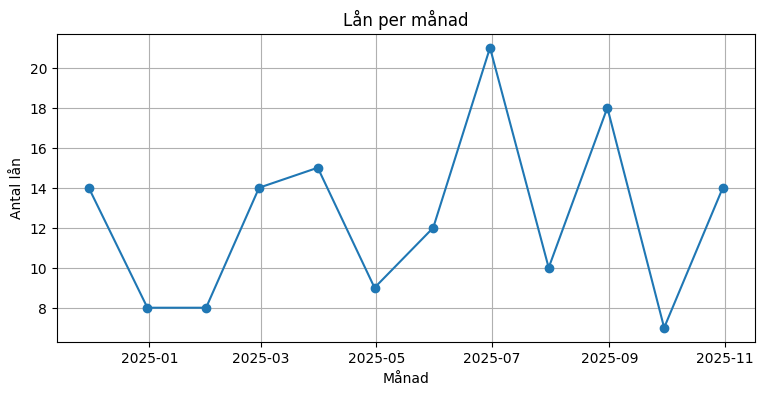

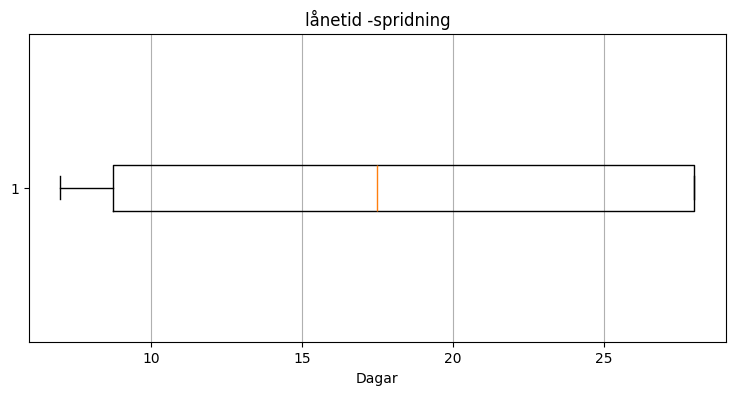

In [12]:
import matplotlib.pyplot as plt
from src import viz as V

# Lån per genre
fig , ax = plt.subplots(figsize =(9,4))
V.bar(ax, by_genre["genre"], by_genre ["loans"], "lån per genre" , "genre" , "Antal lån")

# Top-10 filialer
fig ,ax = plt.subplots(figsize=(9,4))
top_10 = by_branch.head()
V.bar(ax , top_10["branch"], top_10["loans"], "Top-10 filialer","Filial", "Antal lån")

# Lån per månad 
fig ,ax =plt.subplots(figsize =(9,4))
V.line(ax, ts_month["checkout_date"], ts_month["loans"], "Lån per månad", "Månad", "Antal lån")

#Spridning av lånetid
fig ,ax =plt.subplots(figsize =(9,4))
V.box_h(ax, df["loan_day"], "lånetid -spridning","Dagar")

In [ ]:
import pandas as pd


piv = pd.pivot_table(
    df,
    index ="branch",
    columns ="genre",
    values ="loan_id",
    aggfunc="nunique",
    fill_value=0,
    margine=True
)

piv.head()

NameError: name 'pd' is not defined